Shape of the dataset: (178, 14)

First 5 rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Summary statistics:
             Type     Alcohol       Malic     

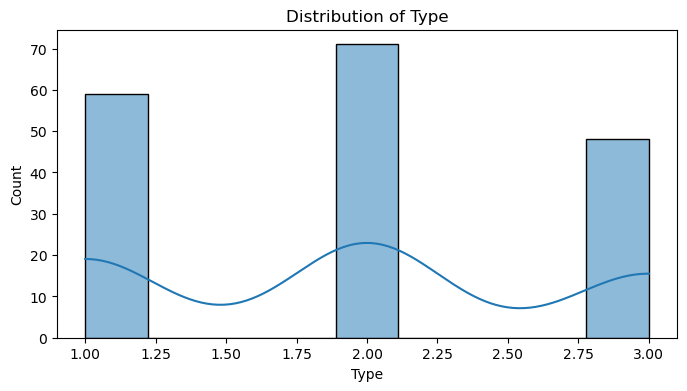

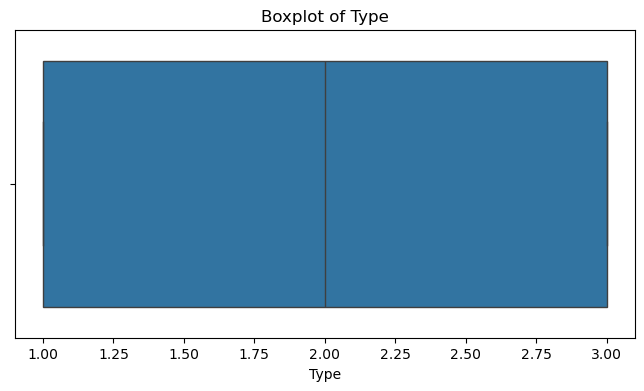

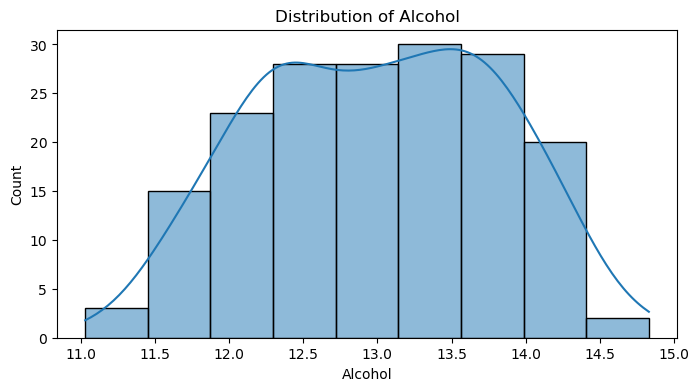

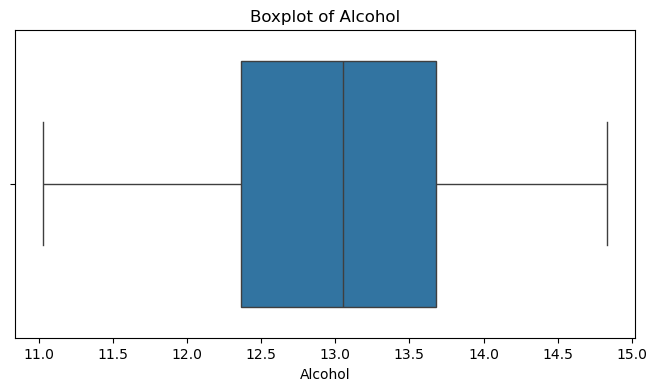

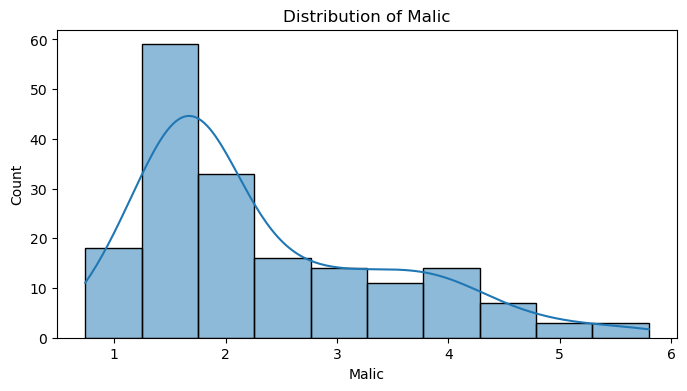

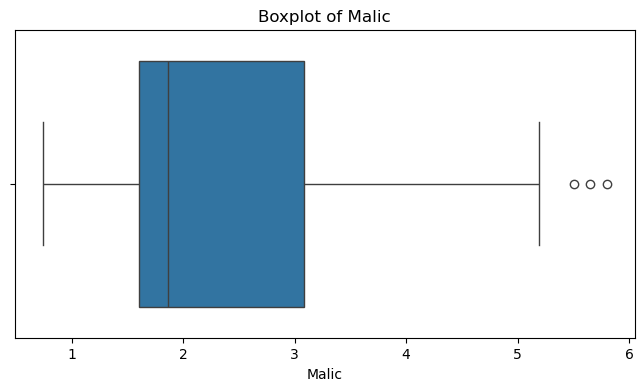

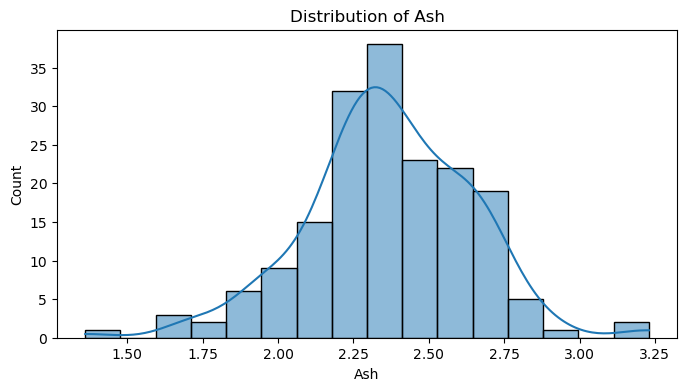

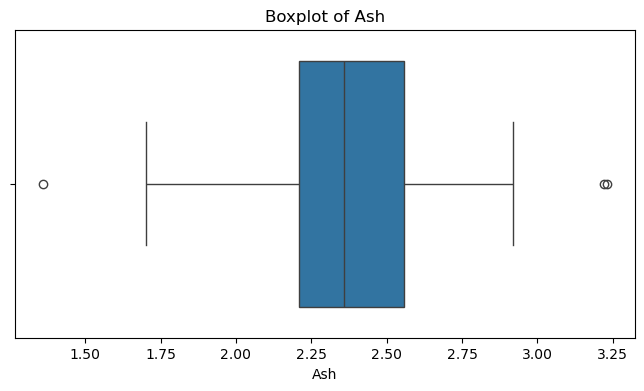

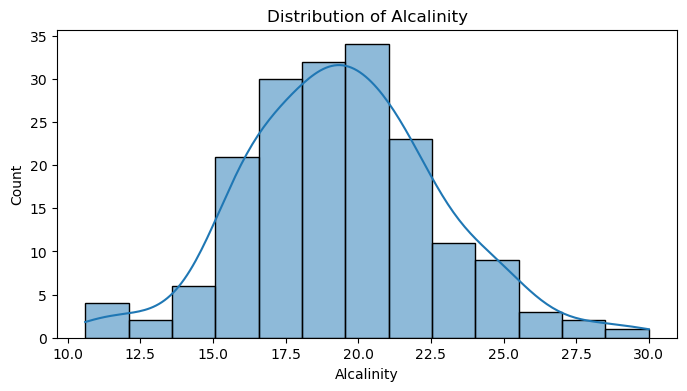

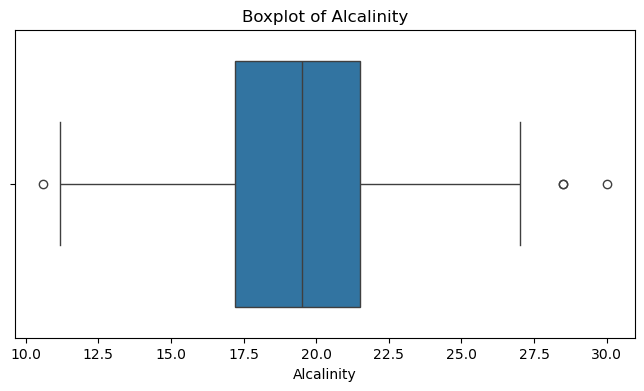

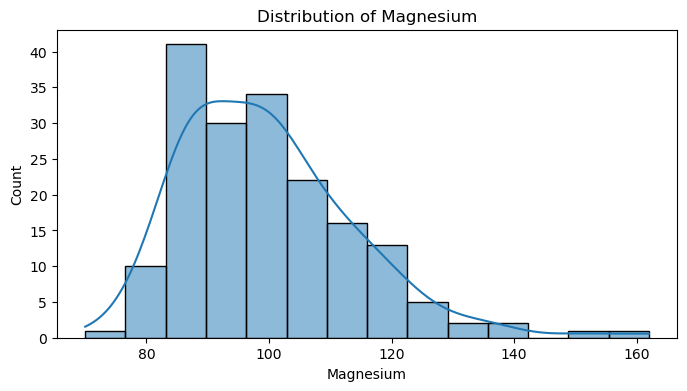

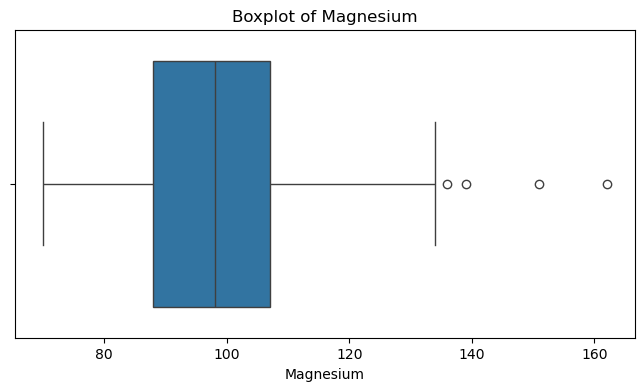

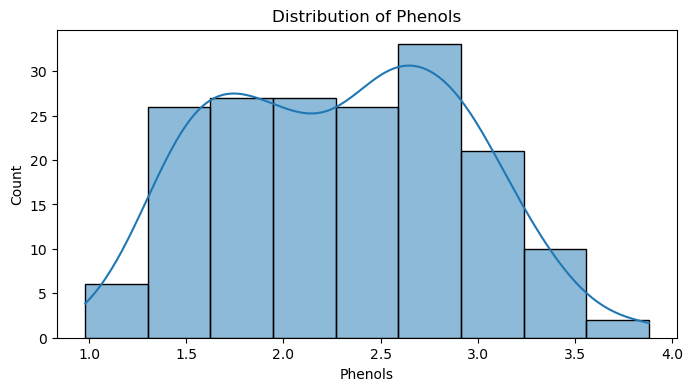

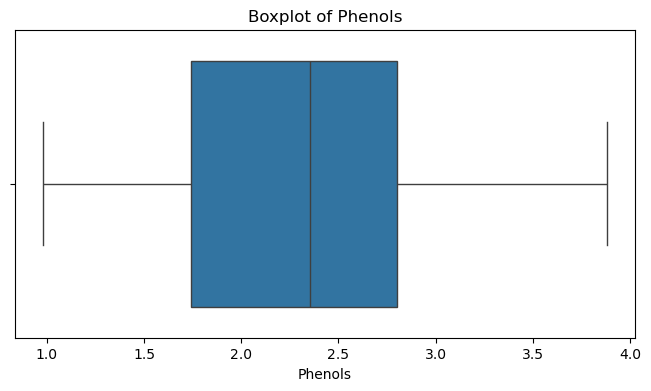

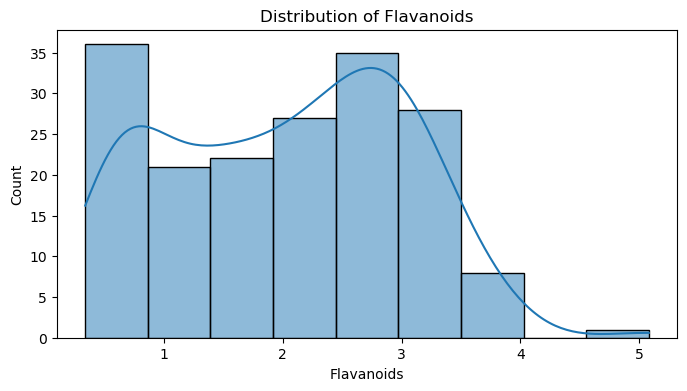

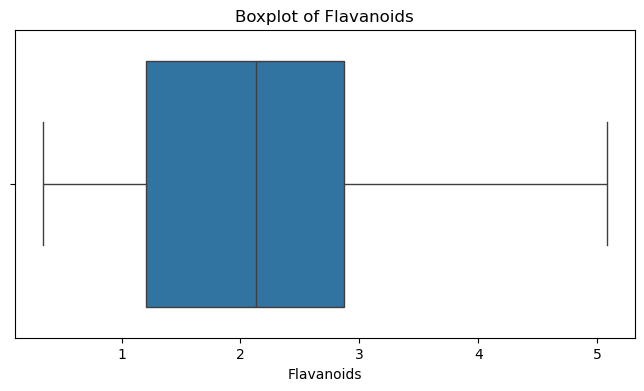

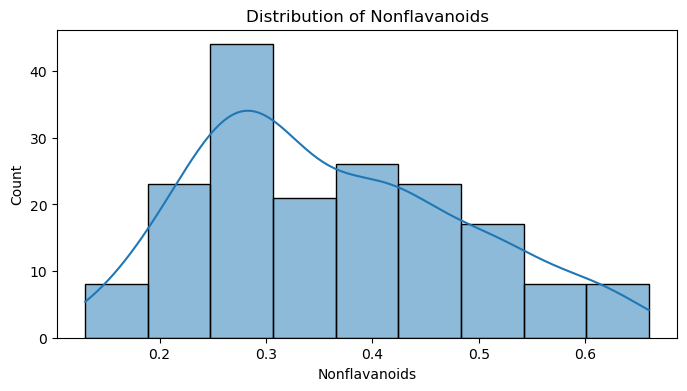

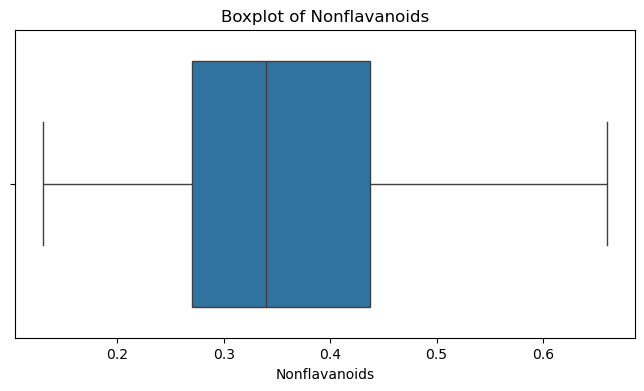

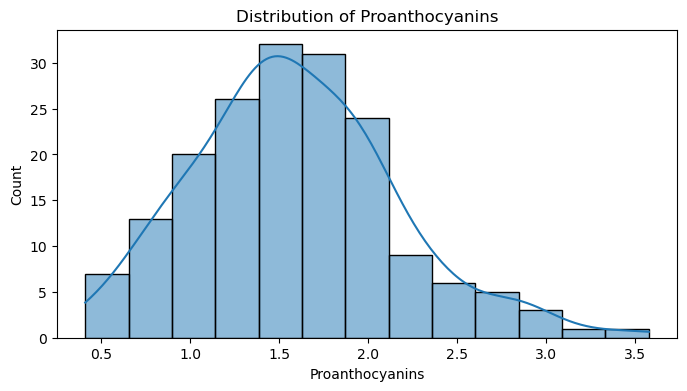

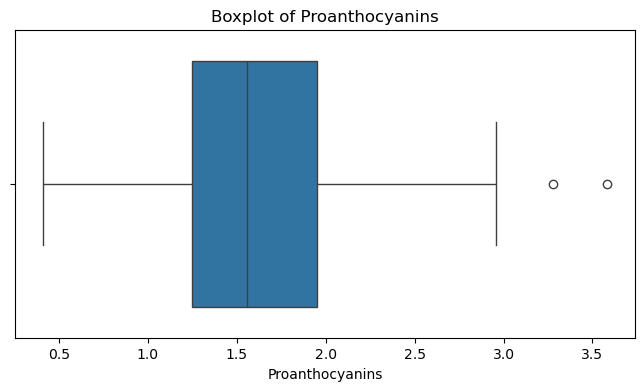

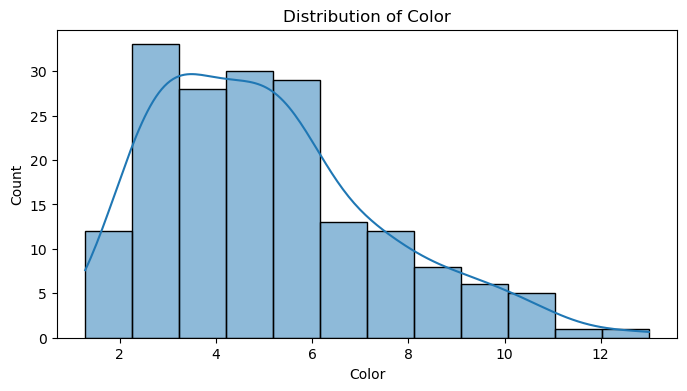

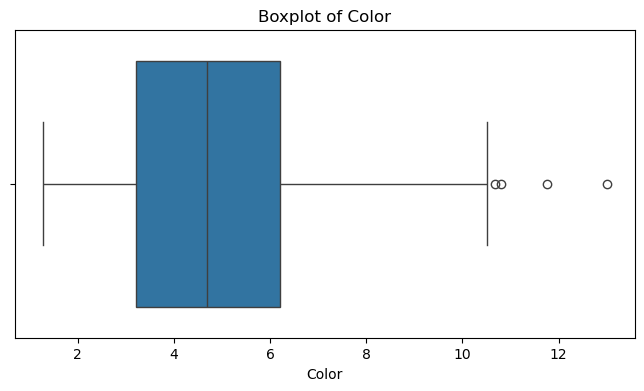

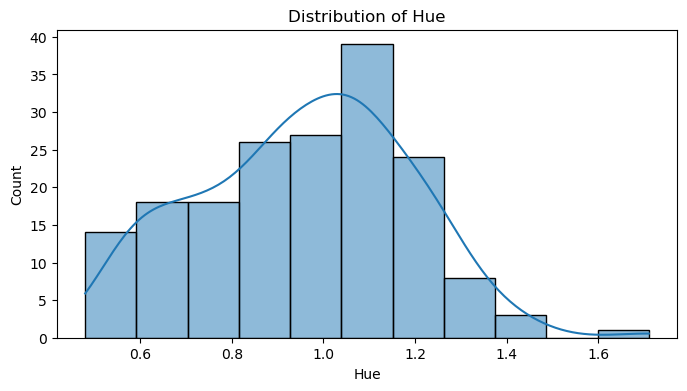

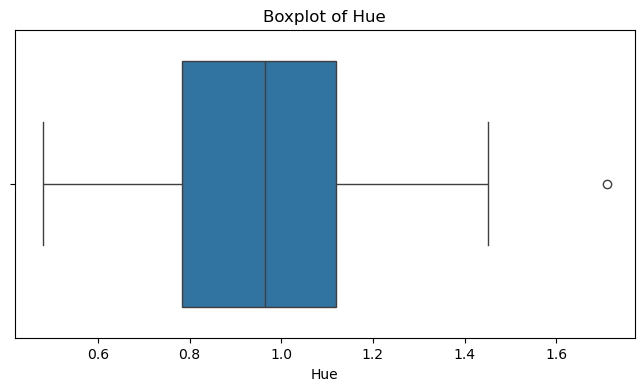

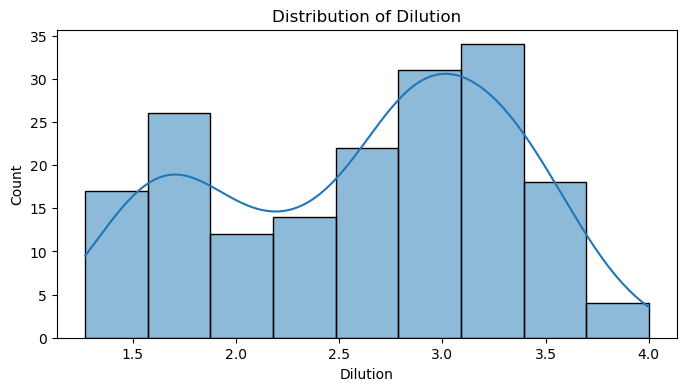

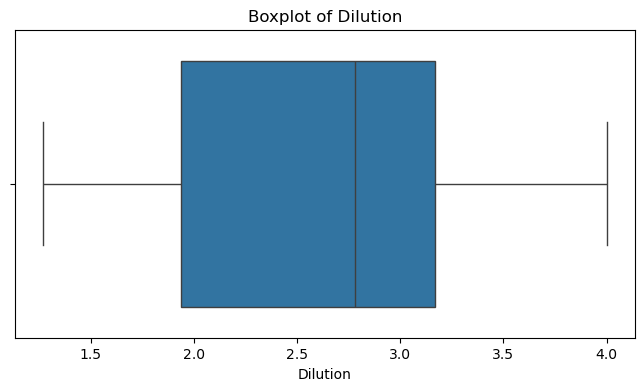

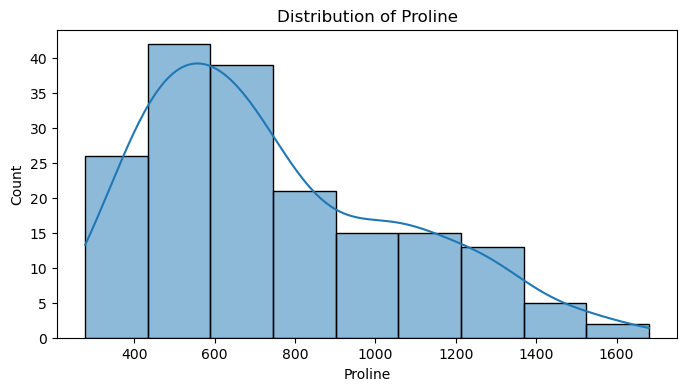

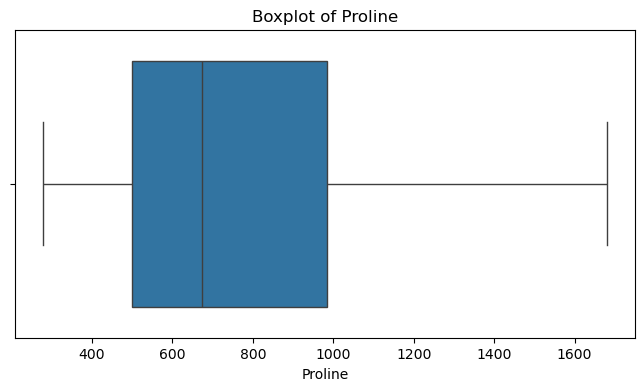

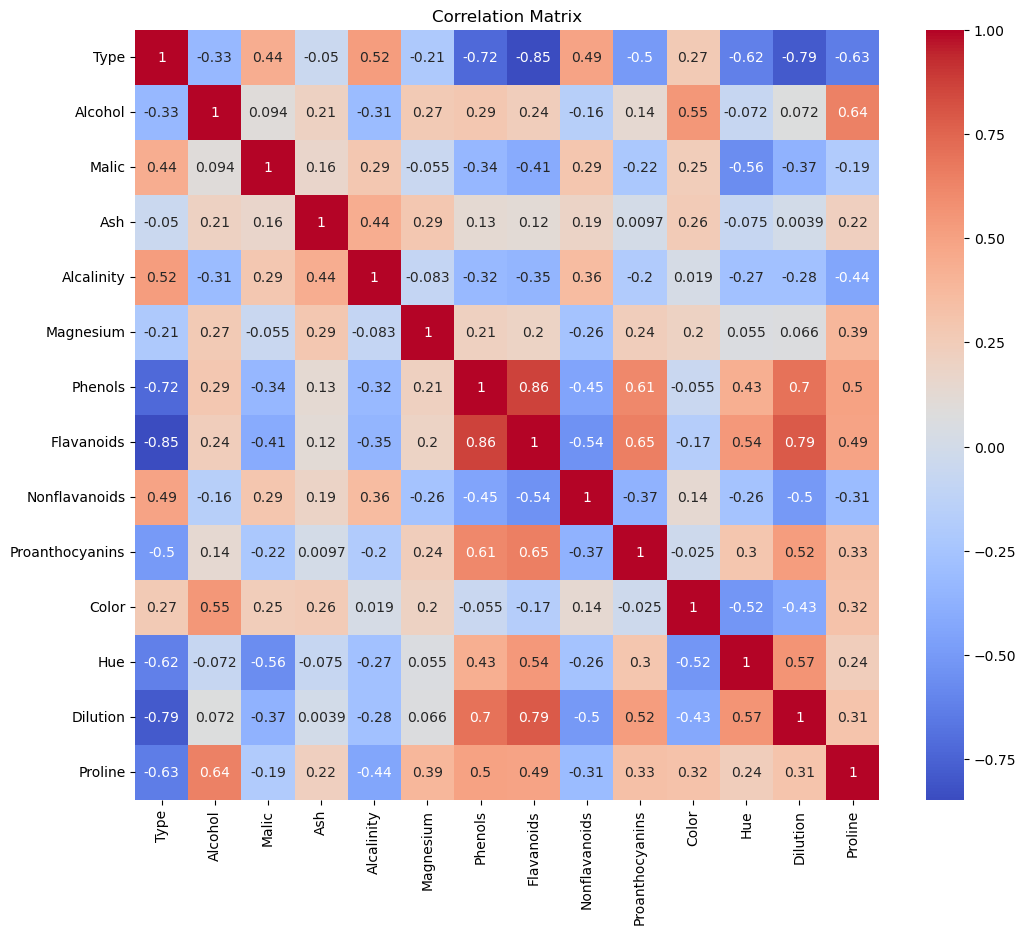

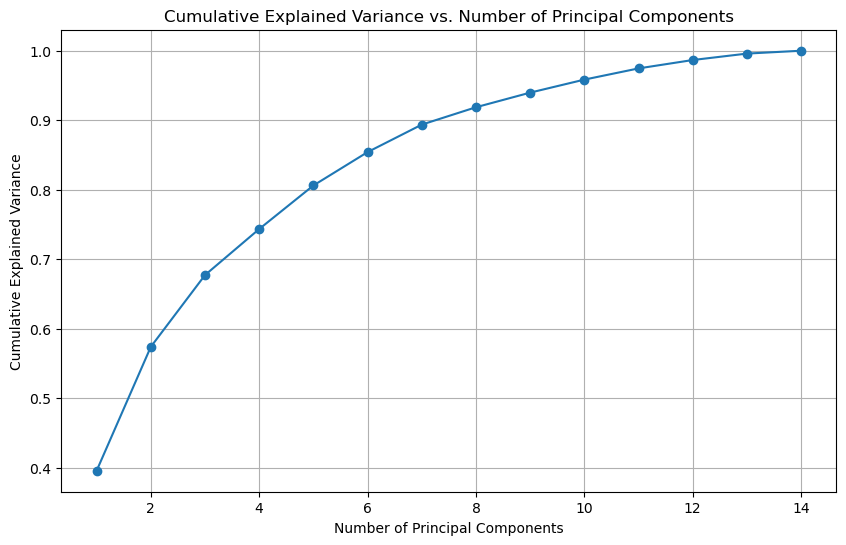

Optimal number of principal components: 10


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

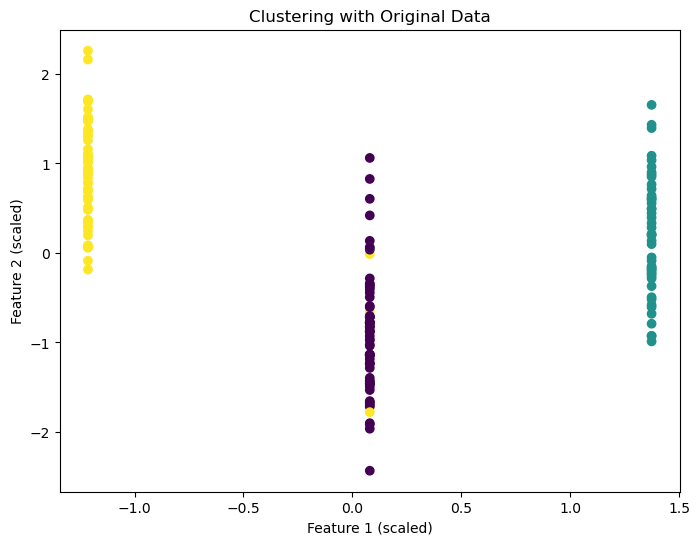

Silhouette Score (Original): 0.30648398324833453
Davies-Bouldin Index (Original): 1.315707552261773


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


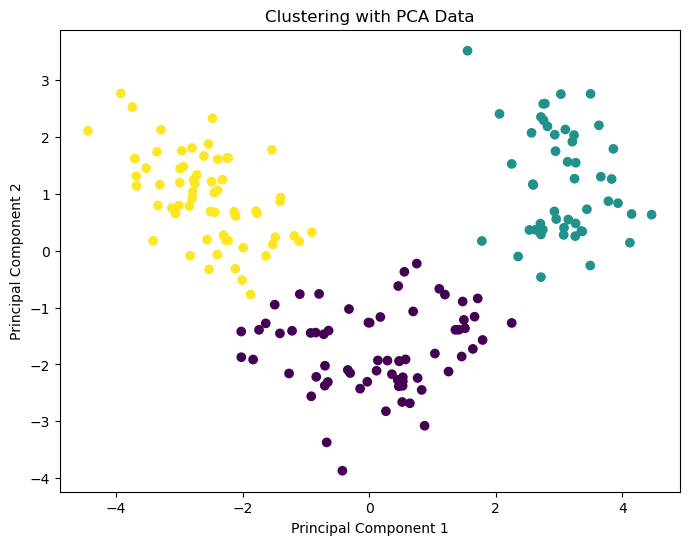

Silhouette Score (PCA): 0.32292055407233006
Davies-Bouldin Index (PCA): 1.2578453408449175

Comparison of Clustering Results:
Original Data - Silhouette Score: 0.30648398324833453, Davies-Bouldin Index: 1.315707552261773
PCA Data - Silhouette Score: 0.32292055407233006, Davies-Bouldin Index: 1.2578453408449175

Conclusion and Insights:
PCA can significantly reduce the dimensionality of the data while preserving important information.
Clustering on PCA-transformed data can sometimes lead to better or comparable results with reduced computational cost.
The choice between using original data or PCA-transformed data depends on the specific dataset and the goals of the analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# --- Task 1: Exploratory Data Analysis (EDA) ---

# 1. Load the dataset and perform basic data exploration.
# Assuming your data is in a CSV file named 'data.csv'
df = pd.read_csv('C:\\Users\\Sindu\\Desktop\\Assignment ExcelR\\PCA\\PCA\\wine.csv')  # Replace 'data.csv' with your file name

print("Shape of the dataset:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nSummary statistics:")
print(df.describe())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# 2. Examine the distribution of features using histograms, box plots, or density plots.
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# 3. Investigate correlations between features to understand relationships within the data.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# --- Task 2: Dimensionality Reduction with PCA ---

# 1. Standardize the features to ensure they have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Implement PCA to reduce the dimensionality of the dataset.
pca = PCA()
pca.fit(scaled_data)

# 2. Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Choose the number of components that explain a significant portion of the variance (e.g., 95%).
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of principal components: {n_components}")

# 3. Transform the original dataset into the principal components.
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# --- Task 3: Clustering with Original Data ---

# 1. Apply a clustering algorithm (e.g., K-means) to the original dataset.
kmeans_original = KMeans(n_clusters=3, random_state=42)  # Choose an appropriate number of clusters
labels_original = kmeans_original.fit_predict(scaled_data)

# 2. Visualize the clustering results using appropriate plots.
# Assuming the first two features are relevant for visualization
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_original, cmap='viridis')
plt.title('Clustering with Original Data')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.show()

# 3. Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
silhouette_original = silhouette_score(scaled_data, labels_original)
davies_bouldin_original = davies_bouldin_score(scaled_data, labels_original)

print(f"Silhouette Score (Original): {silhouette_original}")
print(f"Davies-Bouldin Index (Original): {davies_bouldin_original}")

# --- Task 4: Clustering with PCA Data ---

# 1. Apply the same clustering algorithm to the PCA-transformed dataset.
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Use the same number of clusters
labels_pca = kmeans_pca.fit_predict(pca_data)

# 2. Visualize the clustering results obtained from PCA-transformed data.
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_pca, cmap='viridis')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 3. Compare the clustering results from PCA-transformed data with those from the original dataset.
silhouette_pca = silhouette_score(pca_data, labels_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, labels_pca)

print(f"Silhouette Score (PCA): {silhouette_pca}")
print(f"Davies-Bouldin Index (PCA): {davies_bouldin_pca}")

# --- Task 5: Comparison and Analysis ---

# 1. Compare the clustering results obtained from the original dataset and PCA-transformed data.
# 2. Discuss any similarities or differences observed in the clustering results.
# 3. Reflect on the impact of dimensionality reduction on clustering performance.
# 4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.

print("\nComparison of Clustering Results:")
print(f"Original Data - Silhouette Score: {silhouette_original}, Davies-Bouldin Index: {davies_bouldin_original}")
print(f"PCA Data - Silhouette Score: {silhouette_pca}, Davies-Bouldin Index: {davies_bouldin_pca}")

# --- Task 6: Conclusion and Insights ---

# 1. Summarize the key findings and insights from the assignment.
# 2. Discuss the practical implications of using PCA and clustering in data analysis.
# 3. Provide recommendations for when to use each technique based on the analysis conducted.

print("\nConclusion and Insights:")
print("PCA can significantly reduce the dimensionality of the data while preserving important information.")
print("Clustering on PCA-transformed data can sometimes lead to better or comparable results with reduced computational cost.")
print("The choice between using original data or PCA-transformed data depends on the specific dataset and the goals of the analysis.")